In [1]:
# Spotify Track Insights

## Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Loading the Dataset
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='ISO-8859-1')

In [3]:
## Display the First Few Rows
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [4]:
## General Information About the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [5]:
## Count of Null Values in Each Column
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [6]:
## Function to Remove Commas from a String
def remove(x):
    if pd.isna(x):
        return x
    return str(x).replace(",", "")

In [7]:
## Apply the Remove Function to Relevant Columns
df['All Time Rank'] = df['All Time Rank'].apply(remove).astype(int)
df['Spotify Streams'] = df['Spotify Streams'].apply(remove).astype(float)
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].apply(remove).astype(float)

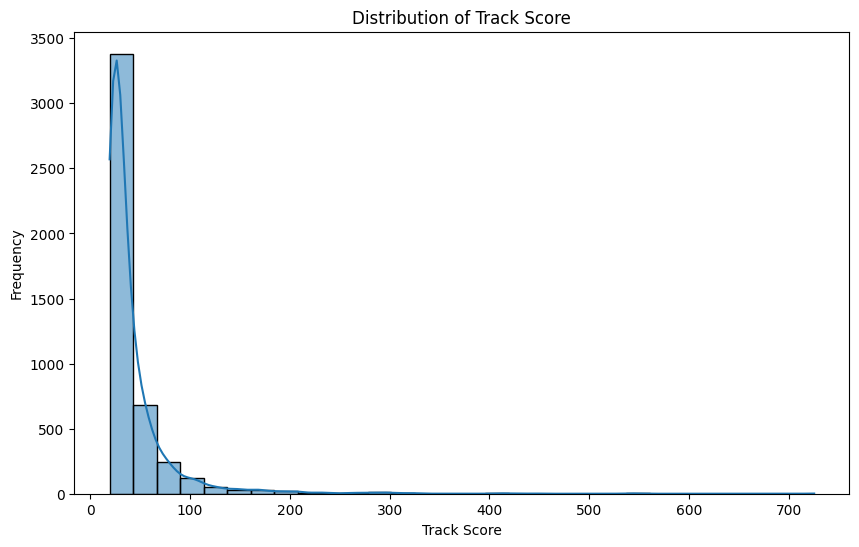

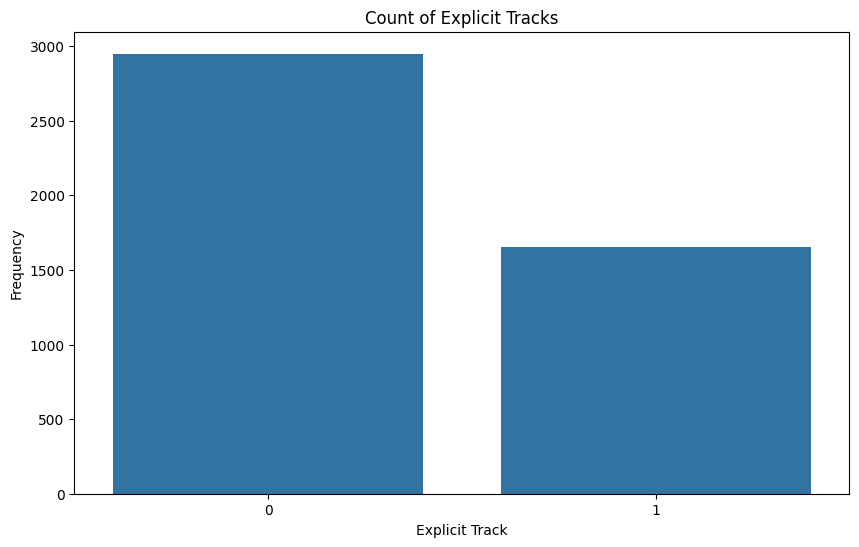

In [8]:
## Univariate Plots

### Distribution of Track Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Track Score'], bins=30, kde=True)
plt.title('Distribution of Track Score')
plt.xlabel('Track Score')
plt.ylabel('Frequency')
plt.show()

### Count of Explicit Tracks
plt.figure(figsize=(10, 6))
sns.countplot(x='Explicit Track', data=df)
plt.title('Count of Explicit Tracks')
plt.xlabel('Explicit Track')
plt.ylabel('Frequency')
plt.show()

## Bivariate Plots

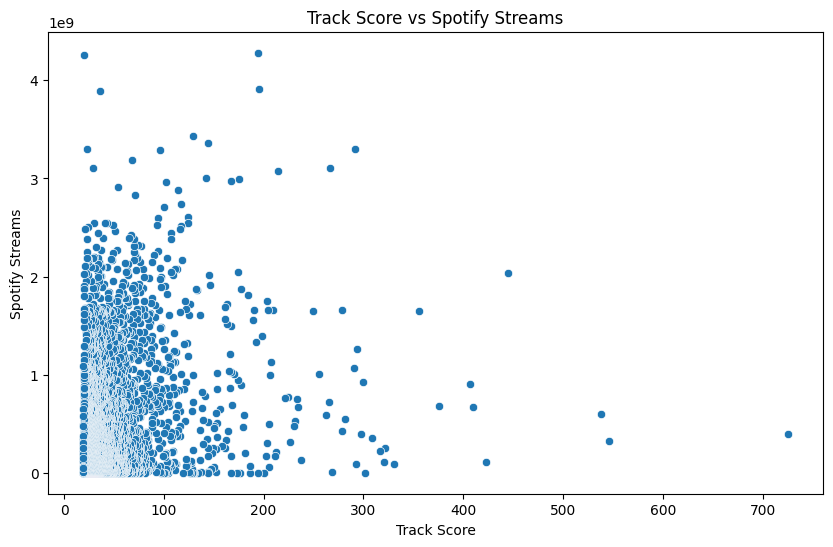

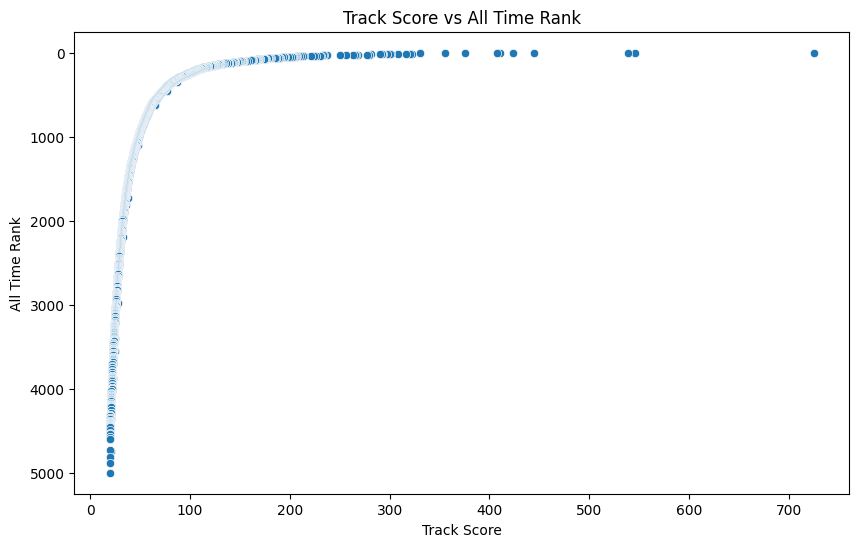

In [9]:
## Bivariate Plots

### Relationship between Track Score and Spotify Streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Track Score', y='Spotify Streams', data=df)
plt.title('Track Score vs Spotify Streams')
plt.xlabel('Track Score')
plt.ylabel('Spotify Streams')
plt.show()

### Relationship between Track Score and All Time Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Track Score', y='All Time Rank', data=df)
plt.title('Track Score vs All Time Rank')
plt.xlabel('Track Score')
plt.ylabel('All Time Rank')
plt.gca().invert_yaxis()  # Invert the y-axis so that higher ranks are at the top
plt.show()

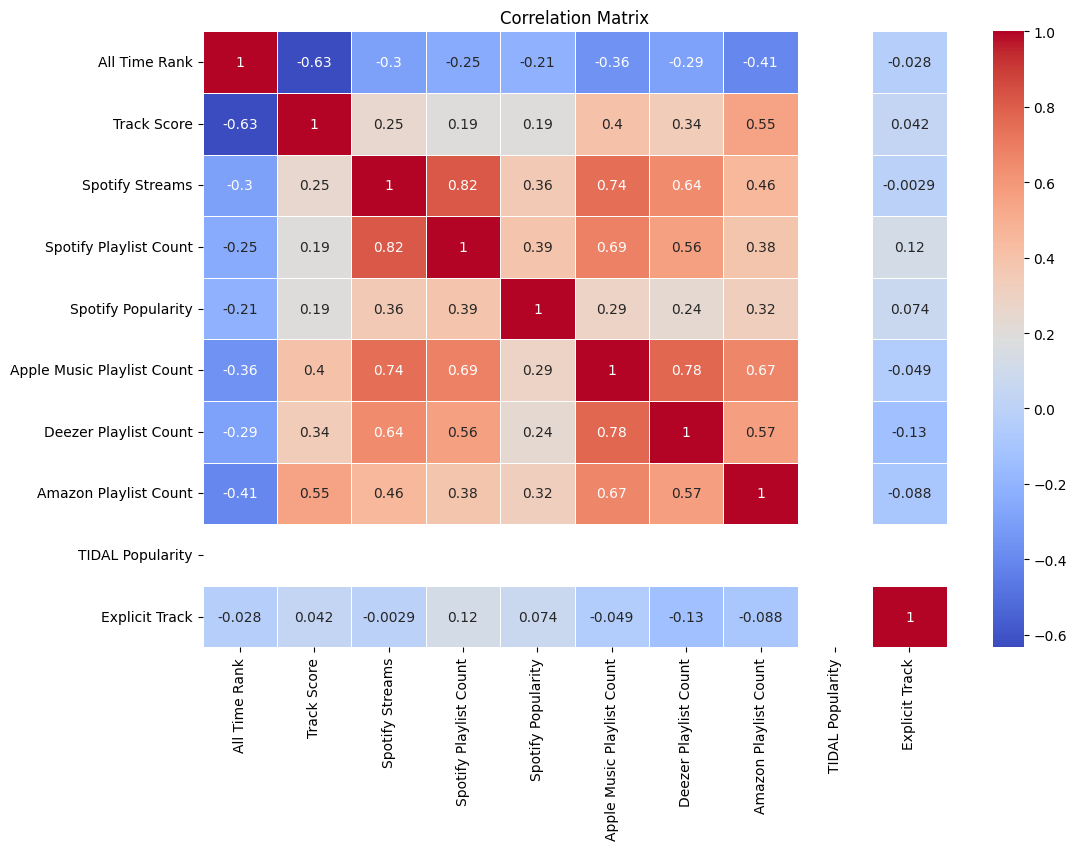

In [10]:
## Correlation Analysis

plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

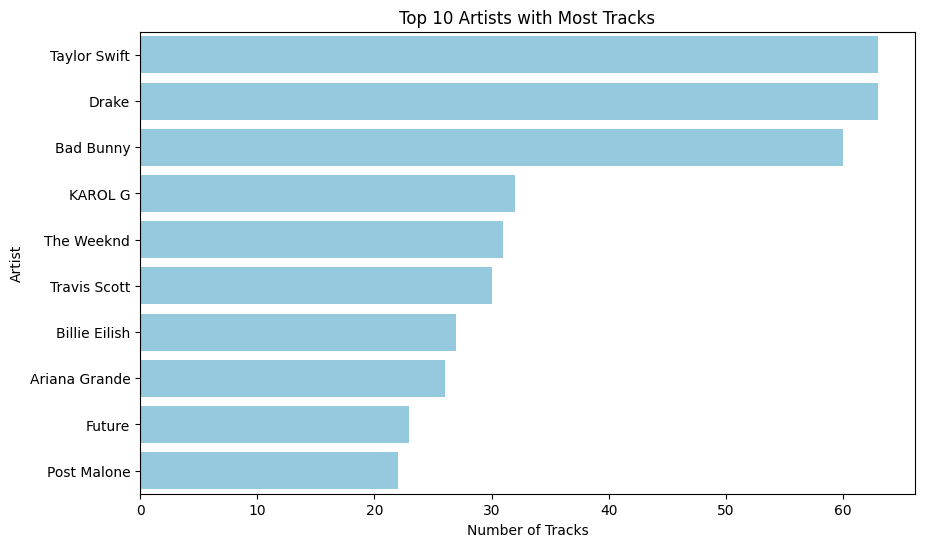

In [11]:
## Additional Analyses and Plots

### Count of Tracks by Artist
top_artists = df['Artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, color='skyblue')  # Use color instead of palette
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

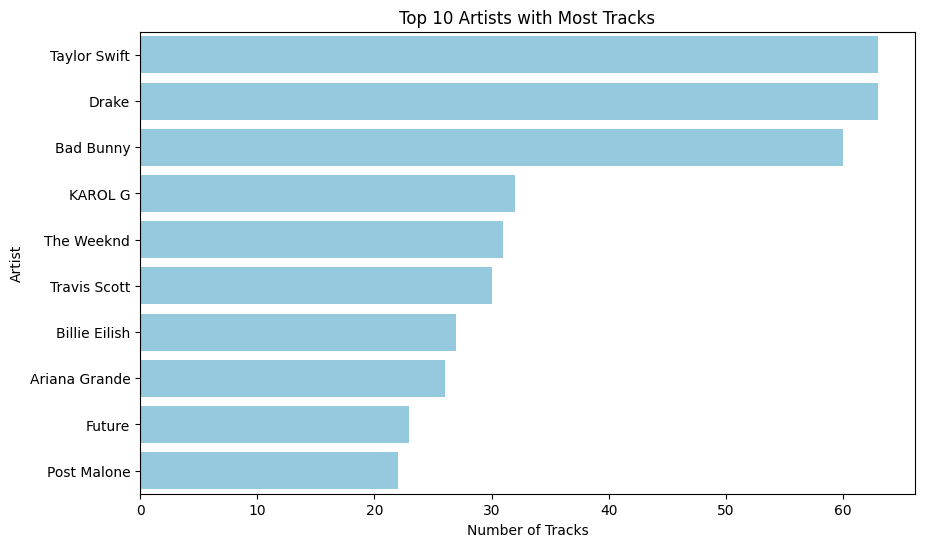

In [12]:
## Additional Analyses and Plots

### Count of Tracks by Artist
top_artists = df['Artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, color='skyblue')  # Use color instead of palette
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

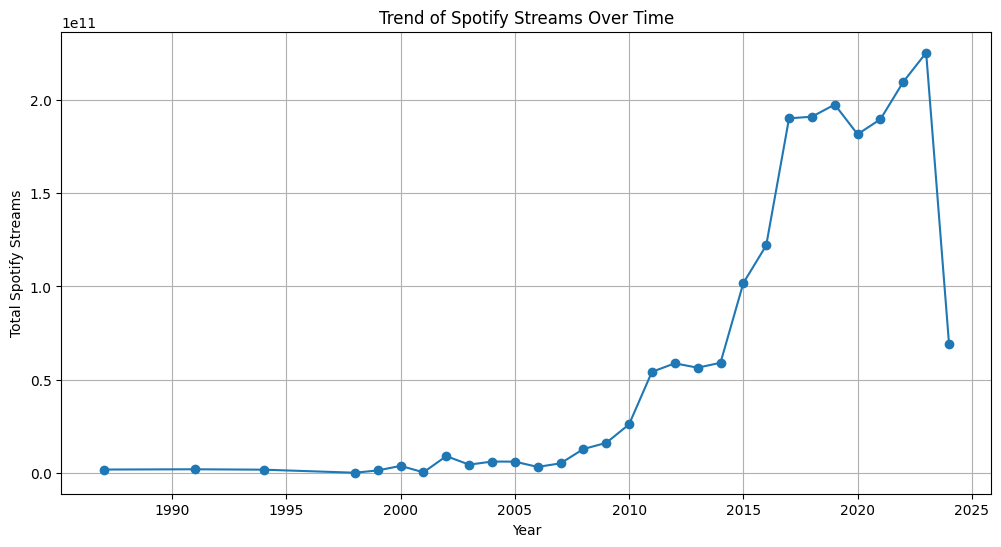

In [13]:
# Trend Analysis Over Time
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Plot the trend of Spotify Streams over time
plt.figure(figsize=(12, 6))
df.groupby(df['Release Date'].dt.year)['Spotify Streams'].sum().plot(kind='line', marker='o')
plt.title('Trend of Spotify Streams Over Time')
plt.xlabel('Year')
plt.ylabel('Total Spotify Streams')
plt.grid(True)
plt.show()

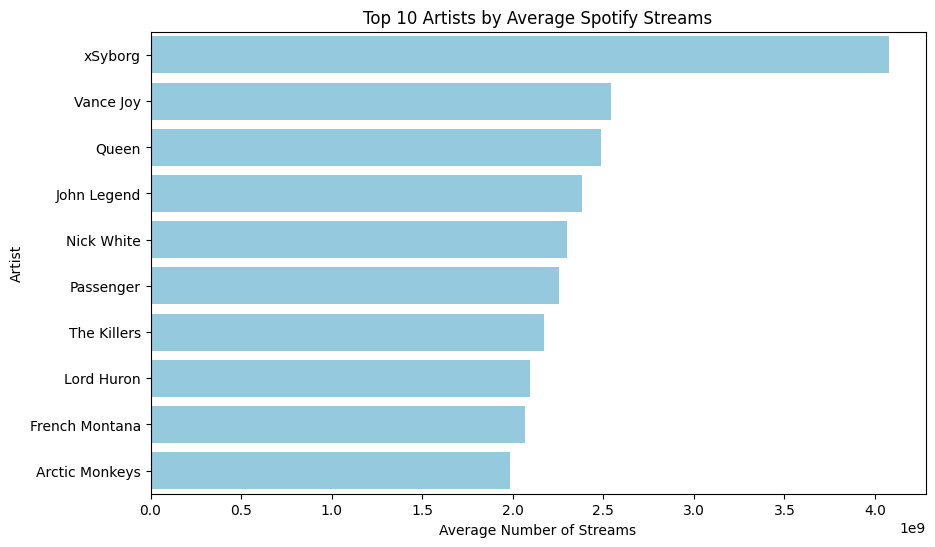

In [14]:
# Average number of streams per artist
average_streams = df.groupby('Artist')['Spotify Streams'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_streams.values, y=average_streams.index, color='skyblue')
plt.title('Top 10 Artists by Average Spotify Streams')
plt.xlabel('Average Number of Streams')
plt.ylabel('Artist')
plt.show()

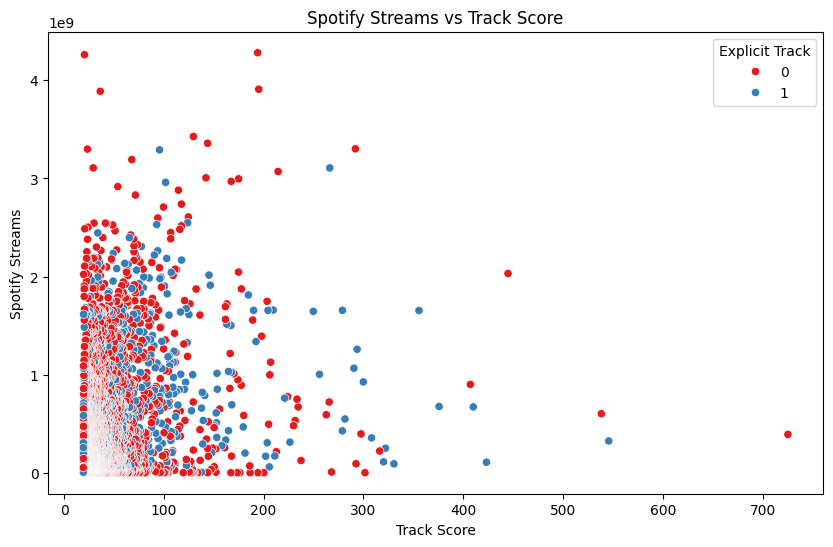

In [15]:
# Spotify Streams Distribution by Track Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Track Score', y='Spotify Streams', data=df, hue='Explicit Track', palette='Set1')
plt.title('Spotify Streams vs Track Score')
plt.xlabel('Track Score')
plt.ylabel('Spotify Streams')
plt.legend(title='Explicit Track')
plt.show()
